Created by Anna Vorreuther

In [5]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import datetime

{'mean': {'concentration': [8, 8.5, 8.7, 7.9, 7.7, 7.85, 7.85, 7.75, 7.65, 7.55, 7.95, 7.55], 'alertness': [8.2, 8.1, 8.3, 8.05, 7.65, 7.55, 7.55, 7.55, 7.15, 7.1, 7.3, 7.2], 'comfortability': [8.3, 8.4, 8.4, 8, 7.8, 7.55, 7.2, 7.15, 7.15, 6.85, 6.9, 6.7]}, 'se': {'concentration': [0.4, 0.324037035, 0.246981781, 0.411096096, 0.425440948, 0.346770818, 0.316622804, 0.293683503, 0.360901649, 0.39019226, 0.268793601, 0.335037311], 'alertness': [0.485798312, 0.498998998, 0.490917508, 0.402802681, 0.458530261, 0.438463225, 0.438463225, 0.415030119, 0.374499666, 0.298328678, 0.202484567, 0.18973666], 'comfortability': [0.375499667, 0.32249031, 0.32249031, 0.424264069, 0.442718872, 0.449722136, 0.490917508, 0.565906353, 0.53874855, 0.519855749, 0.532916504, 0.566568619]}}


C:\Users\Anna\AppData\Local\Temp\ipykernel_29660\804372609.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yLabels)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


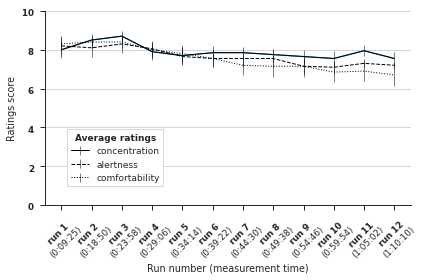

In [15]:
# load in data for df below
with open("../data + material/data/derivative/ratings_mean_se.json", 'r') as f:
    file = json.load(f)

df = pd.DataFrame(data={
    'concentration':file["mean"]["concentration"], 
    'alertness':file["mean"]["alertness"], 
    'comfortability':file["mean"]["comfortability"],  
    'concstderror':file["se"]["concentration"],
    'alertstderror':file["se"]["alertness"], 
    'comfstderror':file["se"]["comfortability"],
})

xLabels = [
    "localizer run 1",
    "localizer run 2",
    *["encoding run " + str(i) for i in range(1,11)],
           ];
#xLabels = ["run " + str(i) for i in range(1, 13)]
t = datetime.timedelta(seconds=0)
times = list()
for i in range(1,13):
    if i <=2:
        t += datetime.timedelta(minutes=9, seconds=25)
    else:
        t += datetime.timedelta(minutes=5, seconds=8)
    times.append(t)
xLabels = [r'$\bf{run}$ ' + fr"$\bf{str(i)}$" + "\n(" + str(times[i-1]) + ")" for i in range(1, 13)]
yLabels = [fr"$\bf{str(i)}$" for i in range(0, 11,2)]
#xLabels = [str(i) for i in range(1, 13)]

sns.set_style("ticks")
sns.set_context("paper")
# plot configs
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 14}
rc('font', **font)

plt.figure(frameon=False, figsize=(6,4))
ax = plt.gca()
fig_args = {'linewidth':1,
            'color':"k",
            'elinewidth':0.5,
           }
ax.errorbar(xLabels,df.concentration, yerr=df.concstderror, label='concentration', linestyle="-", **fig_args)
ax.errorbar(xLabels,df.alertness, yerr=df.alertstderror, label='alertness', linestyle="--", **fig_args)
ax.errorbar(xLabels,df.comfortability, yerr=df.comfstderror, label='comfortability', linestyle=":", **fig_args)

sns.lineplot(x=xLabels, y=df.concentration,err_style="bars", ci=68)
plt.xticks(rotation=45)#, ha='right')
ax.tick_params(pad=5)
plt.xlabel("Run number (measurement time)")
ax.set_ylim([0,10])
ax.set_yticklabels(yLabels)
plt.ylabel("Ratings score")

fontlegend=font_manager.FontProperties(size=9,weight='semibold')
leg = plt.legend(loc='lower left', fontsize=9, framealpha=1, fancybox=False, bbox_to_anchor=(0.05,0.075))
leg.set_title(title='Average ratings',prop=fontlegend)

ax.grid(axis='y')
sns.despine()
plt.tight_layout()
plt.savefig("figure6_ratings.svg", format="svg")
